# Imports

In [3]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns
pd.set_option('display.max_rows', 500)
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
import pingouin as pg
import warnings
warnings.filterwarnings('ignore')

# Data loading and wrangling

Download data from https://zenodo.org/doi/10.5281/zenodo.10698564

In [27]:
train = pd.read_feather('FOLDER/training.feather')

In [5]:
train_lap = pd.DataFrame()
train_lap['Rewarded'] = train.groupby(['Cohort', 'Mouse', 'Day', 'Round', 'Sex']).max()['Reward_Licking']

In [6]:
train_day = pd.DataFrame()
train_day['Laps'] = train.groupby(['Cohort', 'Mouse', 'Day', 'Sex']).max()['Round']
train_day['Time'] = train.groupby(['Cohort', 'Mouse', 'Day', 'Sex']).max()['Time']
train_day['Laps_min'] = train_day.Laps / train_day.Time * 60
train_day['Rewarded_Laps'] = train_lap.reset_index().groupby(['Cohort', 'Mouse', 'Day', 'Sex']).sum()['Rewarded']
train_day['Rewarded_Laps_rel'] = train_lap.reset_index().groupby(['Cohort', 'Mouse', 'Day', 'Sex']).mean()['Rewarded']
train_day['Licks_total'] = train.reset_index().groupby(['Cohort', 'Mouse', 'Day', 'Sex']).sum()['LickLog']
train_day['Velocity_avg'] = train.reset_index().groupby(['Cohort', 'Mouse', 'Day', 'Sex']).mean()['Velocity']
train_day['RestRun'] = train.reset_index().groupby(['Cohort', 'Mouse', 'Day', 'Sex']).mean()['RestRun']
train_day['Weight'] = train.reset_index().groupby(['Cohort', 'Mouse', 'Day', 'Sex']).mean()['Weight']
train_day.head()

Laps      Time  Laps_min  Rewarded_Laps  \
Cohort Mouse Day Sex                                            
1      280   1.0 m    34.0  1799.841  1.133433           18.0   
             2.0 m    30.0  1791.299  1.004857           27.0   
             3.0 m    33.0  1721.516  1.150149           32.0   
             4.0 m    24.0  1892.536  0.760884           13.0   
             5.0 m    28.0  1508.665  1.113567           27.0   

                      Rewarded_Laps_rel  Licks_total  Velocity_avg   RestRun  \
Cohort Mouse Day Sex                                                           
1      280   1.0 m             0.529412          521      6.898905  0.567901   
             2.0 m             0.900000          923      6.282308  0.429640   
             3.0 m             0.969697          872      6.788845  0.378761   
             4.0 m             0.541667          476      4.199408  0.288380   
             5.0 m             0.964286          412      6.618146  0.370523   

                        Weight  
Cohort Mouse Day Sex            
1      280   1.0 m    0.867797  
             2.0 m    0.830508  
             3.0 m    0.810169  
             4.0 m    0.850847  
             5.0 m    0.820339

In [7]:
train_day_rew = pd.DataFrame()
train_day_rew['Licking'] = train.reset_index().groupby(['Cohort', 'Mouse', 'Day', 'Sex', 'Weight', 'Reward_Zone']).mean()['LickLog']
train_day_rew['Velocity_avg'] = train.reset_index().groupby(['Cohort', 'Mouse', 'Day', 'Sex', 'Weight', 'Reward_Zone']).mean()['Velocity']
train_day_rew.reset_index()
train_day_rew.head()

Licking  Velocity_avg
Cohort Mouse Day Sex Weight   Reward_Zone                        
1      280   1.0 m   0.867797 0            0.035421      7.254812
                              1            0.047468      8.930236
                              2            0.118042      3.923199
             2.0 m   0.830508 0            0.066940      6.171280
                              1            0.123318     10.772240

In [8]:
train_posday = pd.DataFrame()
train_posday['Velocity'] = train.groupby(['Cohort', 'Mouse', 'Day', 'Sex', 'Position_Bin']).mean()['Velocity']
train_posday['Licking'] = train.groupby(['Cohort', 'Mouse', 'Day', 'Sex', 'Position_Bin']).mean()['LickLog']
train_posday.head()

Velocity   Licking
Cohort Mouse Day Sex Position_Bin                     
1      280   1.0 m   1.0           10.517986  0.000000
                     2.0           10.733264  0.047619
                     3.0           11.421379  0.040984
                     4.0            3.699852  0.005291
                     5.0            6.819975  0.015707

In [9]:
train_posday_allmice = pd.DataFrame()
train_posday_allmice['Velocity'] = train.groupby(['Day', 'Position_Bin', 'Reward_Zone_Start']).mean()['Velocity']
train_posday_allmice['Velocity_rel'] = train.groupby(['Day', 'Position_Bin', 'Reward_Zone_Start']).mean()['Velocity']
train_posday_allmice['Licking'] = train.groupby(['Day', 'Position_Bin', 'Reward_Zone_Start']).mean()['LickLog']
train_posday_allmice = train_posday_allmice.reset_index()
train_posday_allmice.tail()

,Day,Position_Bin,Reward_Zone_Start,Velocity,Velocity_rel,Licking
495,5.0,48.0,375.0,4.530648,4.530648,0.241114
496,5.0,49.0,-75.0,10.080979,10.080979,0.004073
497,5.0,49.0,375.0,5.895825,5.895825,0.191453
498,5.0,50.0,-75.0,12.468263,12.468263,0.005896
499,5.0,50.0,375.0,9.589433,9.589433,0.119505


# Figure 1B

(-550.0, 456.4164123535156)

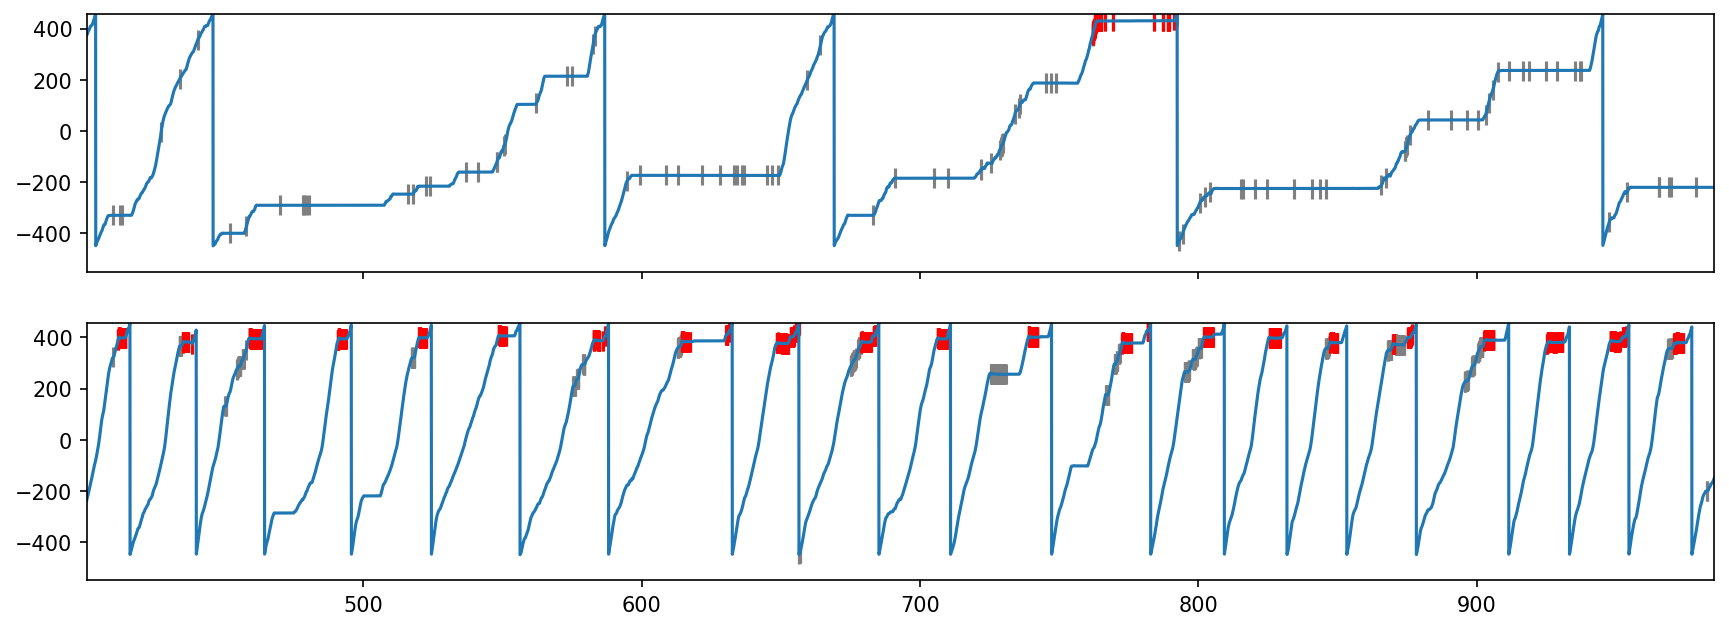

In [10]:
mouse='210'

dataset1 = train.loc[(train.Mouse==mouse)&(train.Day==1)]
dataset5 = train.loc[(train.Mouse==mouse)&(train.Day==5)]

fig, ax=plt.subplots(2, 1, figsize=(14,5), sharex=True, sharey=True)
ax[0].plot(dataset1['Time'], dataset1.Position_Calibrated)
ax[0].scatter(x=dataset1.loc[dataset1.LickLog, 'Time'], y=dataset1.loc[dataset1.LickLog, 'Position_Calibrated'], c='gray', alpha=1, marker='|', s=100)
ax[0].scatter(x=dataset1.loc[dataset1.Reward_Licking, 'Time'], y=dataset1.loc[dataset1.Reward_Licking, 'Position_Calibrated'], c='red', alpha=1, marker='|', s=100)
ax[0].set_xlim(dataset1.Time.min(), dataset1.Time.max())
ax[0].set_ylim(-550, dataset1.Position_Calibrated.max())

ax[1].plot(dataset5['Time'], dataset5.Position_Calibrated)
ax[1].scatter(x=dataset5.loc[dataset5.LickLog, 'Time'], y=dataset5.loc[dataset5.LickLog, 'Position_Calibrated'], c='gray', alpha=1, marker='|', s=100)
ax[1].scatter(x=dataset5.loc[dataset5.Reward_Licking, 'Time'], y=dataset5.loc[dataset5.Reward_Licking, 'Position_Calibrated'], c='red', alpha=1, marker='|', s=100)
ax[1].set_xlim(dataset1.Time.min(), dataset1.Time.max())
ax[1].set_ylim(-550, dataset5.Position_Calibrated.max())


# Figure 1C

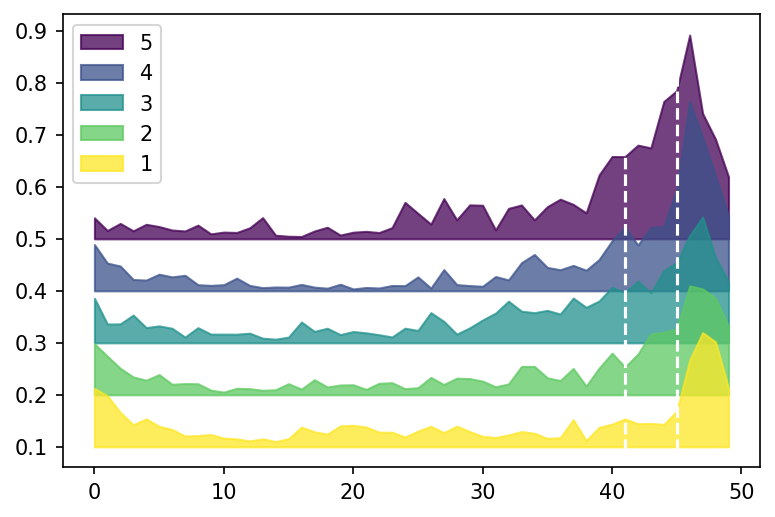

In [11]:
plotme = train_posday_allmice.loc[train_posday_allmice.Reward_Zone_Start==375]

fig, ax = plt.subplots()
for day in [5,4,3,2,1]:
    ax.fill_between(plotme.loc[plotme.Day==day, 'Licking'].reset_index(drop=True).index, plotme.loc[plotme.Day==day, 'Licking'].reset_index(drop=True)+.1*day, y2=.1*day, alpha=.75, color=plt.cm.get_cmap('viridis')(np.linspace(1, 0, 5))[day-1])
plt.legend(['5', '4', '3', '2', '1'])
plt.axvline(41, ls='--', c='w')
plt.axvline(45, ls='--', c='w')


# Figure 1D

<AxesSubplot:xlabel='Day', ylabel='Licking'>

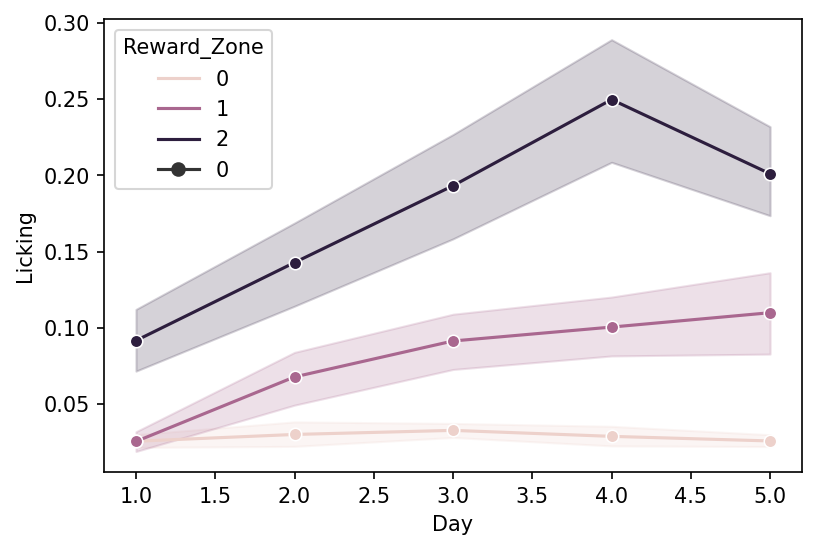

In [12]:
sns.lineplot(data=train_day_rew.reset_index(), x='Day', y='Licking', hue='Reward_Zone', ci=68, markers=True, style=0)

In [13]:
pg.rm_anova(data=train_day_rew.reset_index(), dv='Licking', within=['Day', 'Reward_Zone'], subject='Mouse')

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Day,0.223027,4,60,0.055757,4.108476,5.225481e-03,1.541843e-02,0.103116,0.664327
1,Reward_Zone,0.983264,2,30,0.491632,62.549833,1.984522e-11,5.763206e-08,0.336376,0.630848
2,Day * Reward_Zone,0.140098,8,120,0.017512,4.212154,1.780253e-04,2.222975e-02,0.067356,0.263640


In [14]:
pg.rm_anova(data=train_day_rew.reset_index().loc[train_day_rew.reset_index().Reward_Zone==0], dv='Licking', within='Day', subject='Mouse')

,Source,ddof1,ddof2,F,p-unc,ng2,eps
0,Day,4,64,0.44766,0.773695,0.01681,0.617577


In [15]:
pg.rm_anova(data=train_day_rew.reset_index().loc[train_day_rew.reset_index().Reward_Zone==1], dv='Licking', within='Day', subject='Mouse')

,Source,ddof1,ddof2,F,p-unc,ng2,eps
0,Day,4,60,3.802826,0.008041,0.148154,0.658931


In [16]:
pg.rm_anova(data=train_day_rew.reset_index().loc[train_day_rew.reset_index().Reward_Zone==2], dv='Licking', within='Day', subject='Mouse')

,Source,ddof1,ddof2,F,p-unc,p-GG-corr,ng2,eps,sphericity,W-spher,p-spher
0,Day,4,64,4.276156,0.003958,0.014472,0.141104,0.625981,False,0.137768,0.000825


In [17]:
train_day_rew = train_day_rew.reset_index().set_index(['Cohort', 'Mouse', 'Day', 'Sex', 'Weight'])
rew_ratio = train_day_rew.loc[train_day_rew.Reward_Zone==2] - train_day_rew.loc[train_day_rew.Reward_Zone==0]
antrew_ratio = train_day_rew.loc[train_day_rew.Reward_Zone==1] - train_day_rew.loc[train_day_rew.Reward_Zone==0]

In [18]:
pg.rm_anova(data=rew_ratio.reset_index(), dv='Licking', within='Day', subject='Mouse', detailed=True)

,Source,SS,DF,MS,F,p-unc,p-GG-corr,ng2,eps,sphericity,W-spher,p-spher
0,Day,0.244231,4,0.061058,5.155749,0.001155,0.007338,0.159066,0.595547,False,0.108835,0.000221
1,Error,0.757929,64,0.011843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
pg.rm_anova(data=antrew_ratio.reset_index(), dv='Licking', within='Day', subject='Mouse', detailed=True)

,Source,SS,DF,MS,F,p-unc,p-GG-corr,ng2,eps,sphericity,W-spher,p-spher
0,Day,0.084207,4,0.021052,4.747038,0.002148,0.010805,0.166402,0.598287,False,0.280265,0.049243
1,Error,0.266083,60,0.004435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Figure 1D & Figure S1G-J

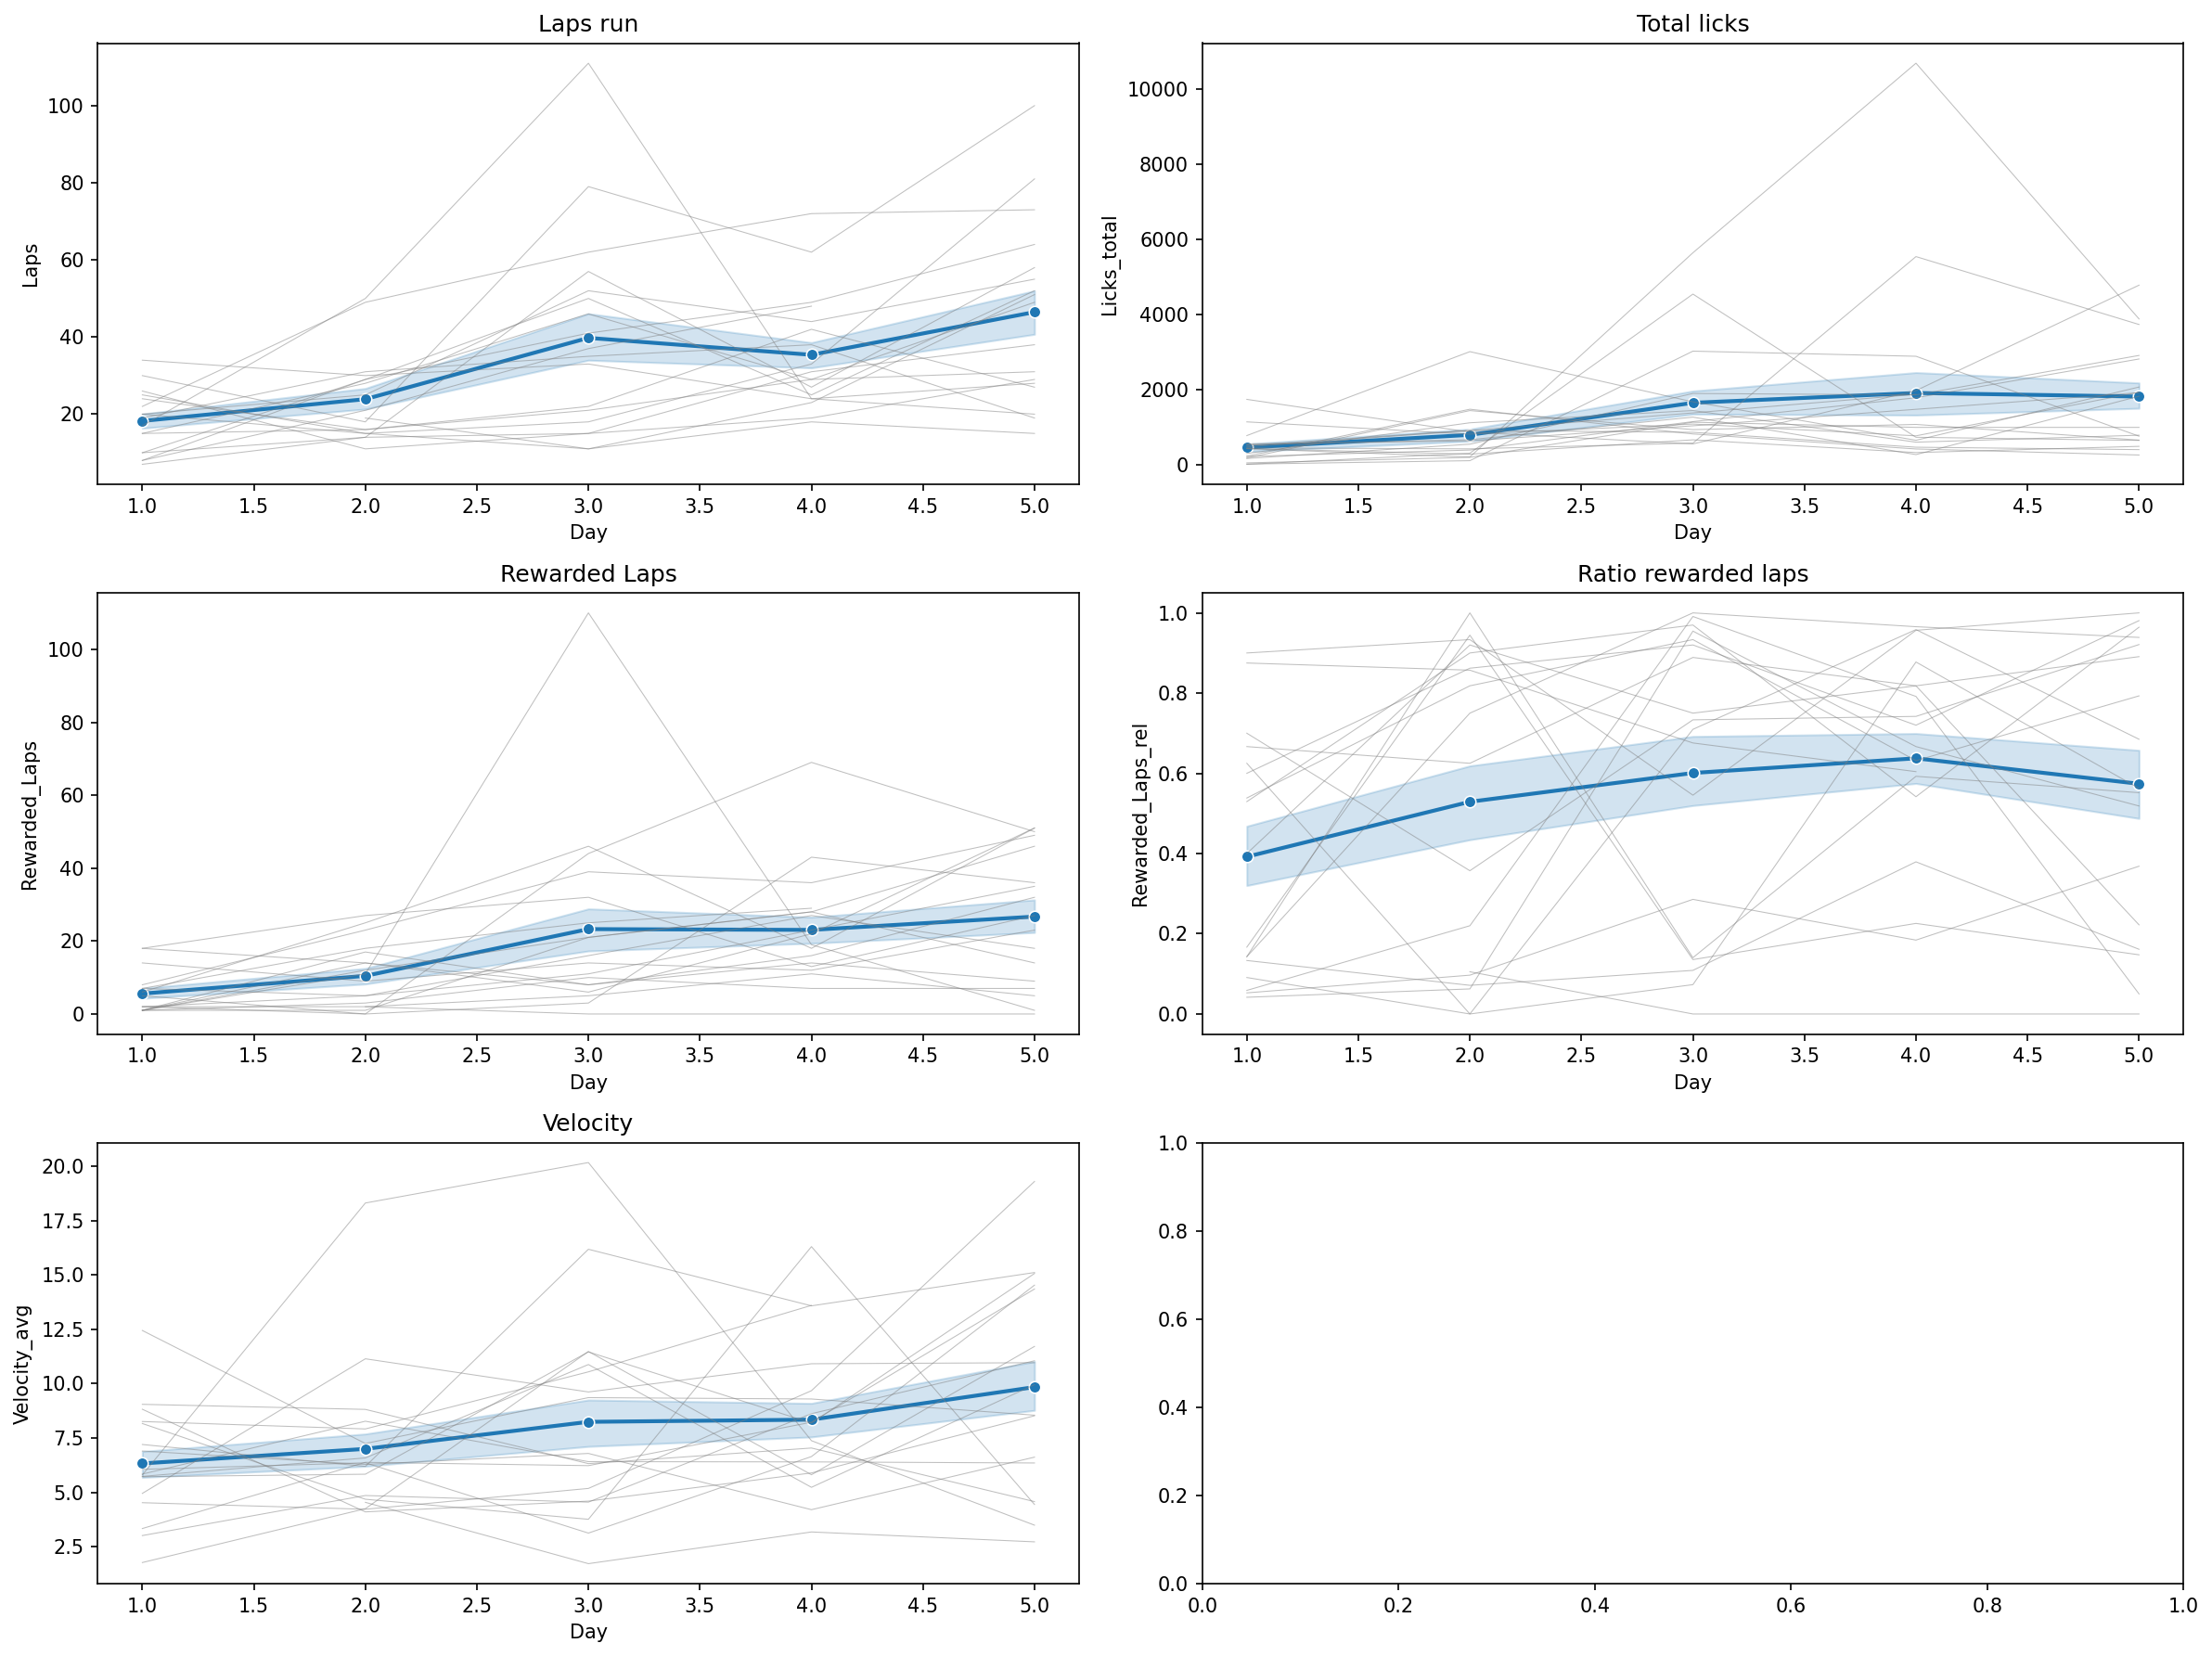

In [20]:
fig, ax = plt.subplots(3,2, figsize=(16,12))

sns.lineplot(data=train_day.reset_index(), x='Day', y='Laps', markers=True, **{'lw':2}, dashes=False, palette='Set1', ax=ax[0,0], style=0, legend=None, ci=68)
sns.lineplot(data=train_day.reset_index(), x='Day', y='Laps', estimator=None, units='Mouse', color='gray', alpha=.5, **{'lw':.5}, ax=ax[0,0])
ax[0,0].set_title('Laps run');

sns.lineplot(data=train_day.reset_index(), x='Day', y='Licks_total', markers=True, **{'lw':2}, dashes=False, palette='Set1', ax=ax[0,1], style=0, legend=None, ci=68)
sns.lineplot(data=train_day.reset_index(), x='Day', y='Licks_total', estimator=None, units='Mouse', color='gray', alpha=.5, **{'lw':.5}, ax=ax[0,1])
ax[0,1].set_title('Total licks');

sns.lineplot(data=train_day.reset_index(), x='Day', y='Rewarded_Laps', markers=True, **{'lw':2}, dashes=False, palette='Set1', ax=ax[1,0], style=0, legend=None, ci=68)
sns.lineplot(data=train_day.reset_index(), x='Day', y='Rewarded_Laps', estimator=None, units='Mouse', color='gray', alpha=.5, **{'lw':.5}, ax=ax[1,0])
ax[1,0].set_title('Rewarded Laps');

sns.lineplot(data=train_day.reset_index(), x='Day', y='Rewarded_Laps_rel', markers=True, **{'lw':2}, dashes=False, palette='Set1', ax=ax[1,1], style=0, legend=None, ci=68)
sns.lineplot(data=train_day.reset_index(), x='Day', y='Rewarded_Laps_rel', estimator=None, units='Mouse', color='gray', alpha=.5, **{'lw':.5}, ax=ax[1,1])
ax[1,1].set_title('Ratio rewarded laps');

sns.lineplot(data=train_day.reset_index(), x='Day', y='Velocity_avg', markers=True, **{'lw':2}, dashes=False, palette='Set1', ax=ax[2,0], style=0, legend=None, ci=68)
sns.lineplot(data=train_day.reset_index(), x='Day', y='Velocity_avg', estimator=None, units='Mouse', color='gray', alpha=.5, **{'lw':.5}, ax=ax[2,0])
ax[2,0].set_title('Velocity');

fig.tight_layout()


In [21]:
pg.rm_anova(dv='Laps', within='Day', subject='Mouse', data=train_day.reset_index(), detailed=True, effsize="ng2")


,Source,SS,DF,MS,F,p-unc,p-GG-corr,ng2,eps,sphericity,W-spher,p-spher
0,Day,9481.675,4,2370.418750,8.77114,0.000012,0.000456,0.272121,0.588024,False,0.153984,0.003065
1,Error,16215.125,60,270.252083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
pg.rm_anova(dv='Licks_total', within='Day', subject='Mouse', data=train_day.reset_index(), detailed=True, effsize="ng2")


,Source,SS,DF,MS,F,p-unc,p-GG-corr,ng2,eps,sphericity,W-spher,p-spher
0,Day,29548162.4,4,7387040.6,3.882727,0.006932,0.032602,0.139426,0.482709,False,0.050688,0.000003
1,Error,121762528.0,64,1902539.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
pg.rm_anova(dv='Rewarded_Laps', within='Day', subject='Mouse', data=train_day.reset_index(), detailed=True, effsize="ng2")


,Source,SS,DF,MS,F,p-unc,p-GG-corr,ng2,eps,sphericity,W-spher,p-spher
0,Day,6393.5,4,1598.375000,6.344059,0.000252,0.004347,0.234686,0.524165,False,0.08176,0.000119
1,Error,15116.9,60,251.948333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
pg.rm_anova(dv='Rewarded_Laps_rel', within='Day', subject='Mouse', data=train_day.reset_index(), detailed=True, effsize="ng2")


,Source,SS,DF,MS,F,p-unc,ng2,eps
0,Day,0.991541,4,0.247885,3.330512,0.015744,0.108134,0.762274
1,Error,4.465714,60,0.074429,NaN,NaN,NaN,NaN


In [25]:
pg.rm_anova(dv='Velocity_avg', within='Day', subject='Mouse', data=train_day.reset_index(), detailed=True, effsize="ng2")


,Source,SS,DF,MS,F,p-unc,ng2,eps
0,Day,153.779495,4,38.444874,2.630758,0.042964,0.124211,0.672322
1,Error,876.816577,60,14.613610,NaN,NaN,NaN,NaN


# Figure S1K-N

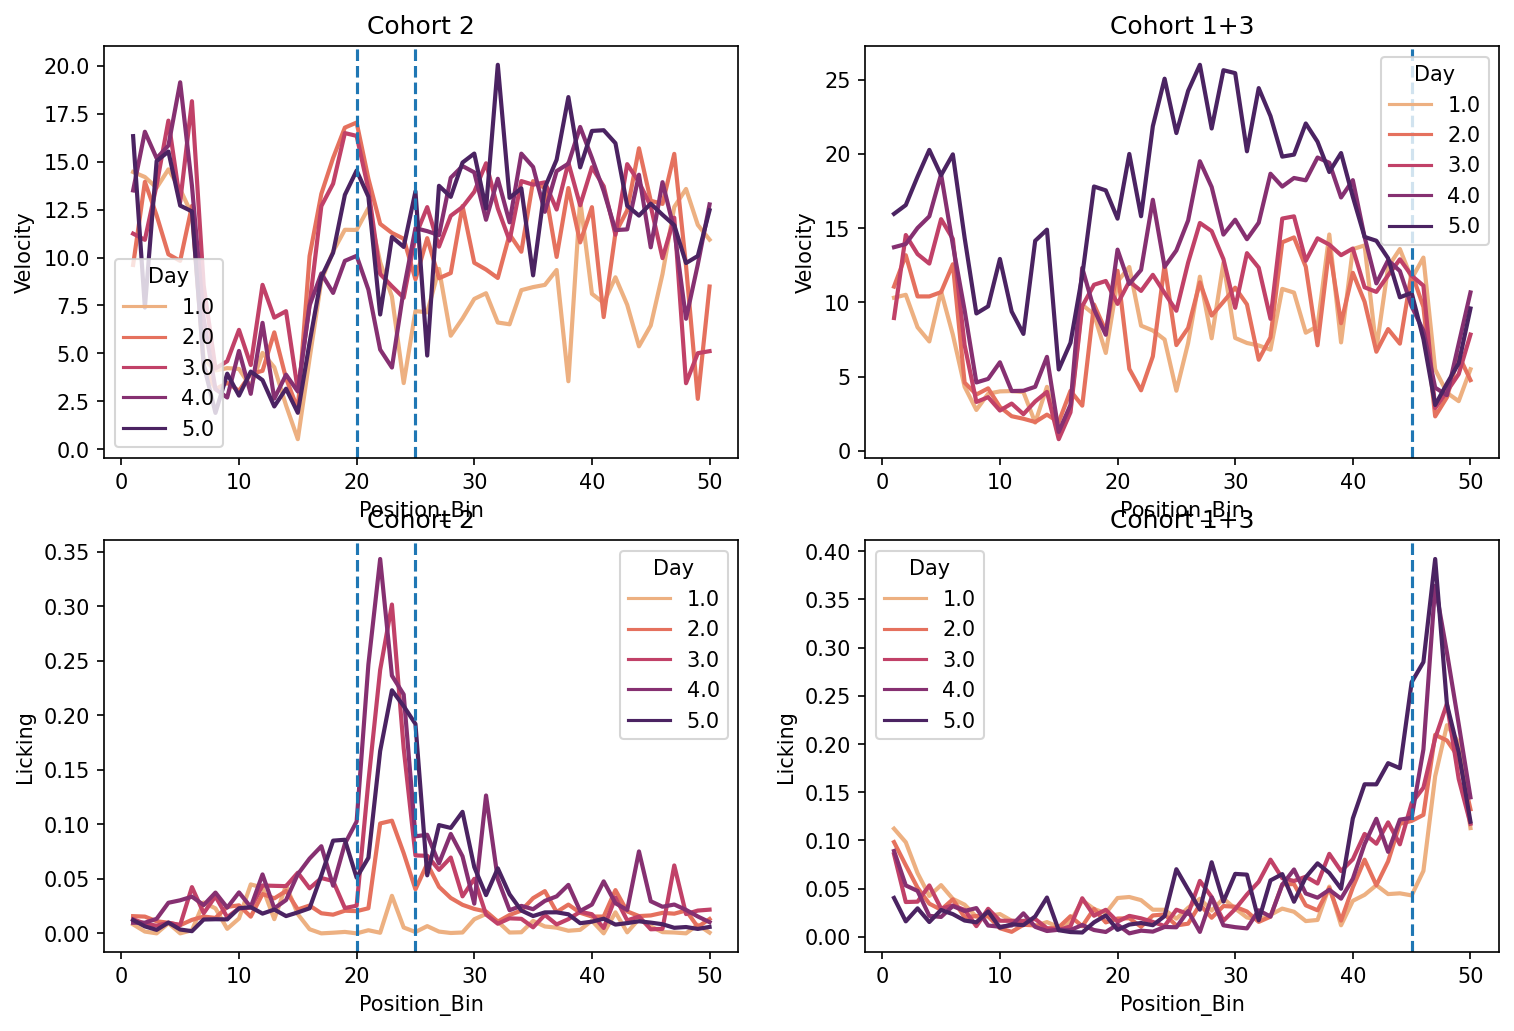

In [26]:

fig, ax = plt.subplots(2,2, figsize=(12,8))

sns.lineplot(data=train_posday_allmice.loc[train_posday_allmice.Reward_Zone_Start==-75], x='Position_Bin', y='Velocity', **{'lw':2}, hue='Day', ax=ax[0,0], palette='flare')
ax[0,0].set_title('Cohort 2')
ax[0,0].axvline(20, ls='--')
ax[0,0].axvline(25, ls='--')

sns.lineplot(data=train_posday_allmice.loc[train_posday_allmice.Reward_Zone_Start==375], x='Position_Bin', y='Velocity', **{'lw':2}, hue='Day', ax=ax[0,1], palette='flare')
ax[0,1].set_title('Cohort 1+3')
ax[0,1].axvline(45, ls='--')

sns.lineplot(data=train_posday_allmice.loc[train_posday_allmice.Reward_Zone_Start==-75], x='Position_Bin', y='Licking', **{'lw':2}, hue='Day', ax=ax[1,0], palette='flare')
ax[1,0].set_title('Cohort 2')
ax[1,0].axvline(20, ls='--')
ax[1,0].axvline(25, ls='--')

sns.lineplot(data=train_posday_allmice.loc[train_posday_allmice.Reward_Zone_Start==375], x='Position_Bin', y='Licking', **{'lw':2}, hue='Day', ax=ax[1,1], palette='flare')
ax[1,1].set_title('Cohort 1+3')
ax[1,1].axvline(45, ls='--')
